# 1.Загружаем данные и подключаем библиотеки

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('applicant_task.csv')

# 2. Исследуем данные

In [3]:
data.head()

,order_id,source,application_datetime,gender,first_call,first_reach,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid
0,10457322,a636bcf354a837fb5c25c3d5b940170b,2020-04-03 04:10:45,1.0,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-04-04 15:28:14.798018,6620229,0
1,11236929,91ce888e6774bd668a675b5640499103,2020-07-12 03:31:39,NaN,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-07-12 15:02:07.545403,4578767,0
2,10246280,91ce888e6774bd668a675b5640499103,2020-02-01 03:19:28,NaN,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-02-02 07:07:41.388133,6290758,0
3,11058994,a636bcf354a837fb5c25c3d5b940170b,2020-05-19 06:18:16,0.0,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-05-19 13:01:02.901309,4700850,0
4,10265283,91ce888e6774bd668a675b5640499103,2020-02-09 21:59:18,NaN,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-02-11 05:33:59.680231,4500083,0


In [4]:
data.shape

(10000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    10000 non-null  int64  
 1   source                      10000 non-null  object 
 2   application_datetime        10000 non-null  object 
 3   gender                      5084 non-null   float64
 4   first_call                  10000 non-null  object 
 5   first_reach                 9418 non-null   object 
 6   operator_group_type         10000 non-null  object 
 7   operator_group_name         10000 non-null  object 
 8   trial_appointment_datetime  10000 non-null  object 
 9   appointment_added_by_id     10000 non-null  int64  
 10  is_paid                     10000 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 859.5+ KB


## Приведем колонки в удобный формат

In [6]:
data['order_id'] = data['order_id'].apply(str)
data['application_datetime'] = pd.to_datetime(data['application_datetime'])
data['first_call'] = pd.to_datetime(data['first_call'])
data['first_reach'] = pd.to_datetime(data['first_reach'])
data['trial_appointment_datetime'] = pd.to_datetime(data['trial_appointment_datetime'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  object        
 1   source                      10000 non-null  object        
 2   application_datetime        10000 non-null  datetime64[ns]
 3   gender                      5084 non-null   float64       
 4   first_call                  10000 non-null  datetime64[ns]
 5   first_reach                 9418 non-null   datetime64[ns]
 6   operator_group_type         10000 non-null  object        
 7   operator_group_name         10000 non-null  object        
 8   trial_appointment_datetime  10000 non-null  datetime64[ns]
 9   appointment_added_by_id     10000 non-null  int64         
 10  is_paid                     10000 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
m

## Сделаем маппинг хэш кодов, чтобы было удобно с ними работать

In [8]:
sourse_to_hash = dict(enumerate(set(data['source'])))
hash_to_source = {v: k for k, v in sourse_to_hash.items()}
operator_group_type_to_hash = dict(enumerate(set(data['operator_group_type'])))
hash_to_operator_group_type = {v: k for k, v in operator_group_type_to_hash.items()}
operator_group_name_to_hash = dict(enumerate(set(data['operator_group_name'])))
hash_to_operator_group_name = {v: k for k, v in operator_group_name_to_hash.items()}

In [9]:
data['source'] = data['source'].map(hash_to_source)
data['operator_group_type'] = data['operator_group_type'].map(hash_to_operator_group_type)
data['operator_group_name'] = data['operator_group_name'].map(hash_to_operator_group_name)

In [10]:
data.head()

,order_id,source,application_datetime,gender,first_call,first_reach,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid
0,10457322,8,2020-04-03 04:10:45,1.0,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,1,17,2020-04-04 15:28:14.798018,6620229,0
1,11236929,20,2020-07-12 03:31:39,NaN,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,1,17,2020-07-12 15:02:07.545403,4578767,0
2,10246280,20,2020-02-01 03:19:28,NaN,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,0,2,2020-02-02 07:07:41.388133,6290758,0
3,11058994,8,2020-05-19 06:18:16,0.0,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,1,17,2020-05-19 13:01:02.901309,4700850,0
4,10265283,20,2020-02-09 21:59:18,NaN,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,1,17,2020-02-11 05:33:59.680231,4500083,0


## Посмотрим как менялось количество заявок и конверсия в течение времени

In [11]:
applications_by_date = data.groupby(data['application_datetime'].dt.date)\
                           .agg({'order_id': 'count', 'is_paid': 'sum'})

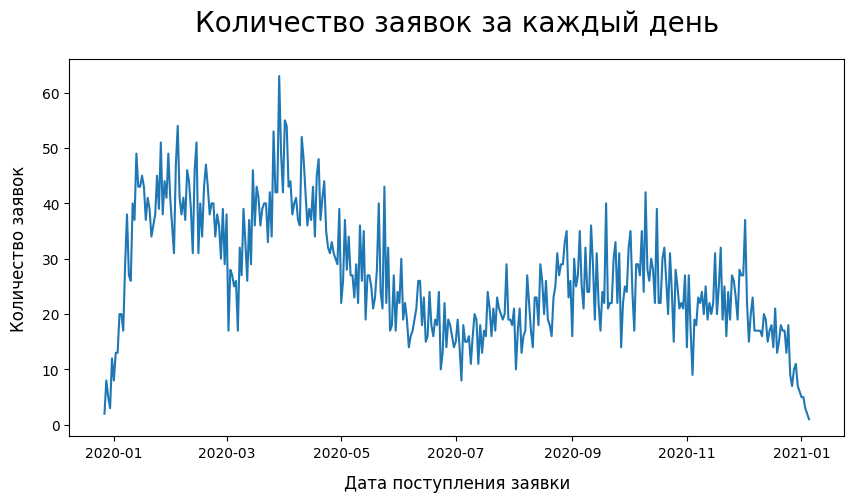

In [12]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(applications_by_date['order_id'])
plt.xlabel('Дата поступления заявки', labelpad=10, fontsize=12)
plt.ylabel('Количество заявок', labelpad=10, fontsize=12)
plt.title('Количество заявок за каждый день', fontdict={'fontsize': 20}, pad=20)
plt.show()

In [13]:
applications_by_date['C1'] = round(applications_by_date['is_paid'] / applications_by_date['order_id'] * 100, 1)

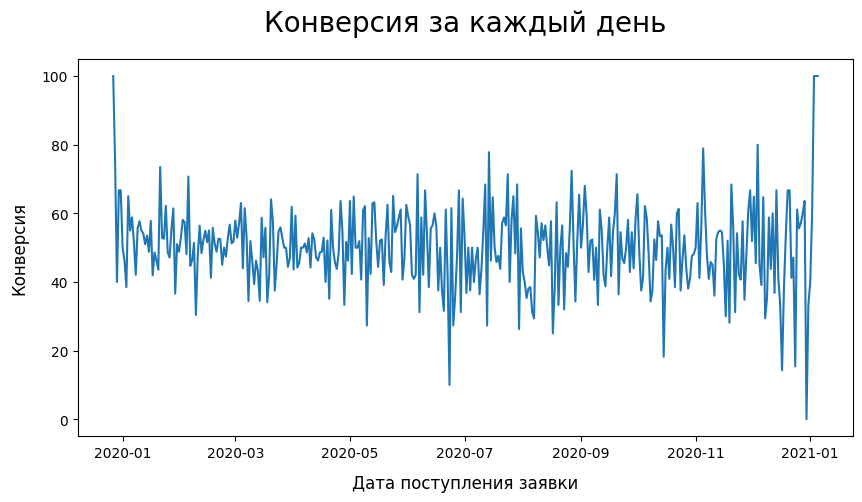

In [14]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(applications_by_date['C1'])
plt.xlabel('Дата поступления заявки', labelpad=10, fontsize=12)
plt.ylabel('Конверсия', labelpad=10, fontsize=12)
plt.title('Конверсия за каждый день', fontdict={'fontsize': 20}, pad=20)
plt.show()

## Вычислим общую конверсию C1

In [15]:
C1 = data['is_paid'].sum() / len(data['order_id']) * 100
print(f'Конверсия С1 составляет {C1}%')

Конверсия С1 составляет 50.18%


## Как ведет себя конверсия по разным разбивкам?

In [16]:
def plot_conversion_by_dimension(data, dimension):
    conversion_by_dimension = data.groupby(dimension).agg({'is_paid': 'sum', 'order_id': 'count'}).reset_index()
    conversion_by_dimension.columns = [dimension, 'orders_amount', 'applications_amount']
    conversion_by_dimension['C1'] = round(conversion_by_dimension['orders_amount'] / conversion_by_dimension['applications_amount'] * 100, 1)
        
    plt.figure(figsize=(10,5), dpi=100)
    plt.bar(x = conversion_by_dimension[dimension], height=conversion_by_dimension['applications_amount'], color='#50c878')
    plt.bar(x = conversion_by_dimension[dimension], height=conversion_by_dimension['orders_amount'])
    plt.xticks(ticks=conversion_by_dimension[dimension])
    plt.xlabel(dimension, labelpad=10, fontsize=12)
    plt.ylabel('Количество заявок / покупок', labelpad=10, fontsize=12)
    plt.title('Количество заявок и покупок в разрезе ' + dimension, fontdict={'fontsize': 20}, pad=20)    
    plt.show()

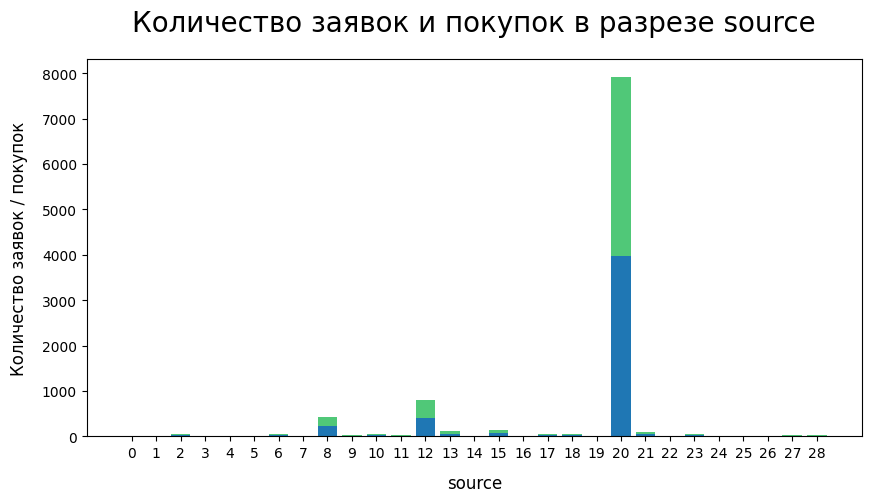

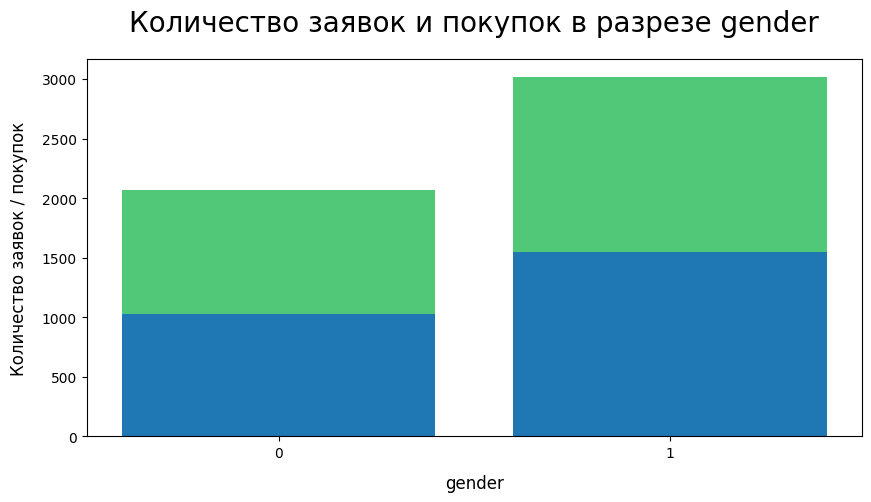

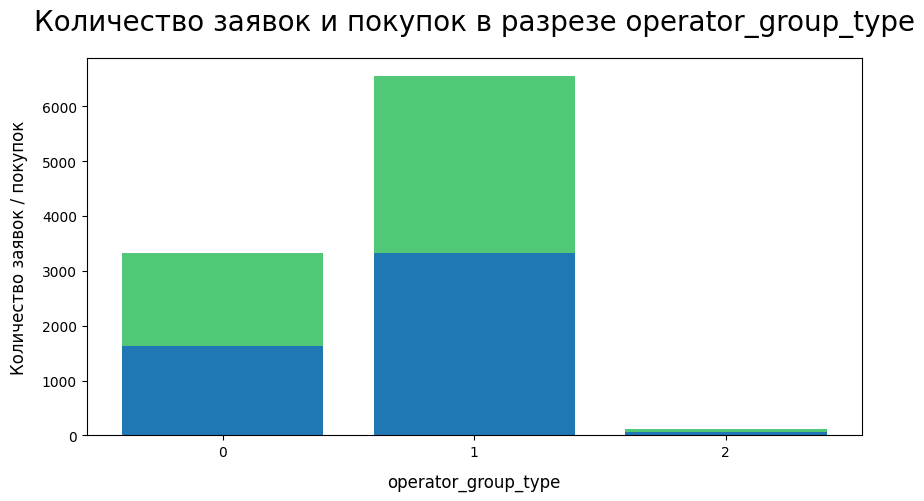

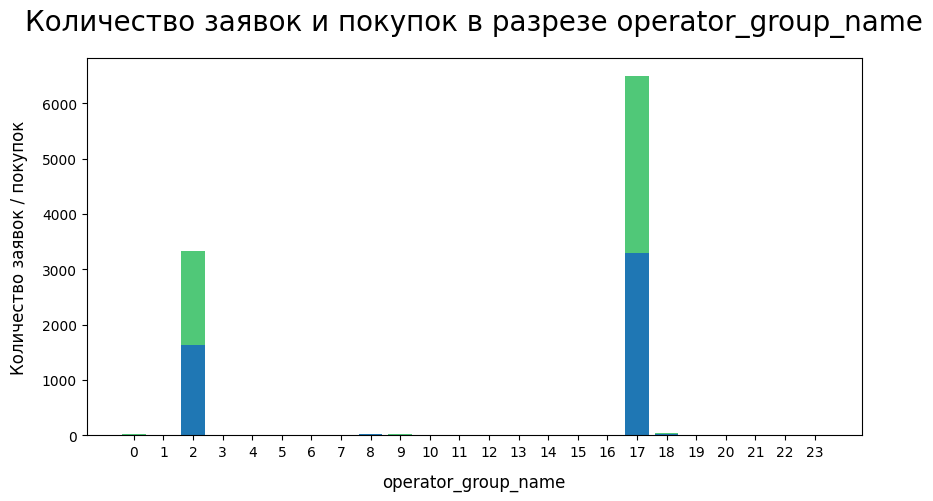

In [17]:
dims = ['source', 'gender', 'operator_group_type', 'operator_group_name']
for dim in dims:
    plot_conversion_by_dimension(data, dim)

В каждом разрезе соотношение покупок к заявкам приблизительно одинаково.

## Так как операторов много, то график построить не получится, посмотрим в числах

In [18]:
data['appointment_added_by_id'].nunique()

1101

In [19]:
conversion_by_operator = data.groupby('appointment_added_by_id').agg({'is_paid': 'sum', 'order_id': 'count'}).reset_index()
conversion_by_operator.columns = ['appointment_added_by_id', 'orders_amount', 'applications_amount']
conversion_by_operator['C1'] = round(conversion_by_operator['orders_amount'] / conversion_by_operator['applications_amount'] * 100, 1)

In [20]:
conversion_by_operator.sort_values(by='orders_amount', ascending=False).head(10)

,appointment_added_by_id,orders_amount,applications_amount,C1
0,-2,629,1292,48.7
584,6453883,63,109,57.8
656,6956477,41,65,63.1
553,6418973,35,59,59.3
364,5550313,34,76,44.7
270,5064182,34,77,44.2
81,2795419,32,74,43.2
512,6344055,32,55,58.2
101,3427039,32,59,54.2
494,6343172,32,73,43.8


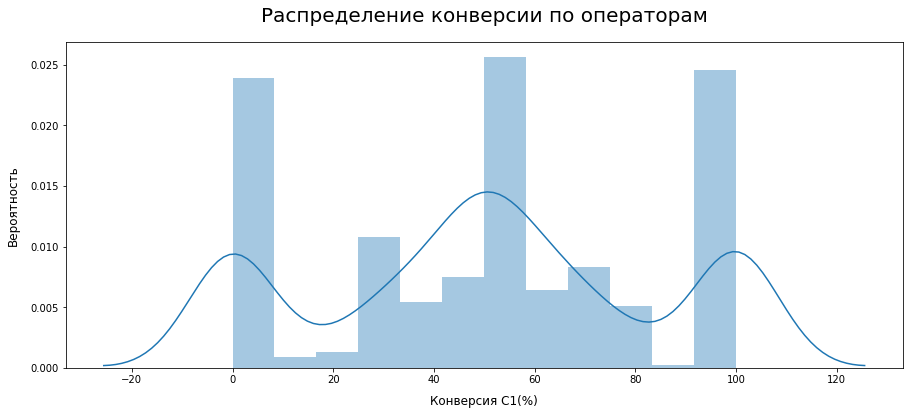

In [21]:
plt.figure(figsize=(15, 6))
sns.distplot(conversion_by_operator['C1'])
plt.xlabel('Конверсия С1(%)', labelpad=10, fontsize=12)
plt.ylabel('Вероятность', labelpad=10, fontsize=12)
plt.title('Распределение конверсии по операторам', fontdict={'fontsize': 20}, pad=20)
plt.show()

In [22]:
perc_25 = np.percentile(conversion_by_operator['C1'], 25)
perc_25

28.6

## Выберем и сохраним тех операторов, у которых конверсия меньше 25-ого перцентиля и обработано от 10 заявок

In [23]:
bad_operators = conversion_by_operator[(conversion_by_operator['C1'] < perc_25)
                                       & (conversion_by_operator['applications_amount'] >= 10)]

bad_operators = bad_operators.rename(columns={'appointment_added_by_id': 'operator_id'})
bad_operators

,operator_id,orders_amount,applications_amount,C1
117,3646384,9,33,27.3
205,4700301,2,10,20.0
221,4811357,3,13,23.1
247,4986521,3,11,27.3
333,5369270,3,11,27.3
498,6343704,3,12,25.0
574,6453783,2,12,16.7
919,10575052,4,17,23.5
1009,10781918,6,22,27.3


In [24]:
bad_operators.to_csv('bad_operators.csv')

# 3. Гипотеза: у пользователей, которые совершили покупку, обработка заявки заняла меньше времени, чем у тех кто не совершил. Проверим.


## Посчитаем разницу между временем первого звонка и временем поступления заявки

In [25]:
data['diff_between_fc_ad'] = (data['first_call'] - data['application_datetime']) / pd.offsets.Hour(1)

In [26]:
data.head()

,order_id,source,application_datetime,gender,first_call,first_reach,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid,diff_between_fc_ad
0,10457322,8,2020-04-03 04:10:45,1.0,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,1,17,2020-04-04 15:28:14.798018,6620229,0,12.554030
1,11236929,20,2020-07-12 03:31:39,NaN,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,1,17,2020-07-12 15:02:07.545403,4578767,0,1.259253
2,10246280,20,2020-02-01 03:19:28,NaN,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,0,2,2020-02-02 07:07:41.388133,6290758,0,73.431364
3,11058994,8,2020-05-19 06:18:16,0.0,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,1,17,2020-05-19 13:01:02.901309,4700850,0,1.008225
4,10265283,20,2020-02-09 21:59:18,NaN,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,1,17,2020-02-11 05:33:59.680231,4500083,0,11.257762


## Разделим на группы (была покупка или нет) и построим боксплоты для сравнения

In [27]:
data_paid_success = data[data['is_paid'] == 1]
data_paid_fail = data[data['is_paid'] == 0]

In [28]:
print(f'Размер выборки с покупкой равен {len(data_paid_success)}')
print(f'Размер выборки без покупки равен {len(data_paid_fail)}')

Размер выборки с покупкой равен 5018
Размер выборки без покупки равен 4982


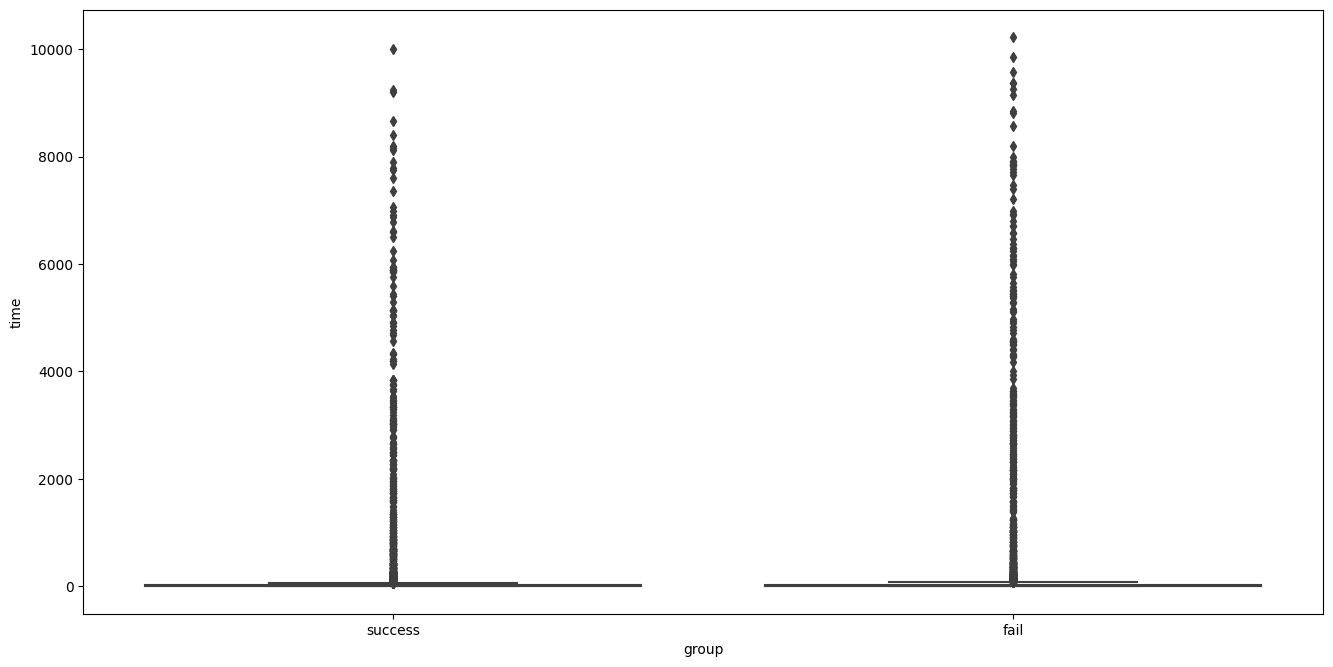

In [29]:
plt.figure(figsize=(16,8), dpi=100)
boxplot = pd.concat([pd.DataFrame({'group': 'success', 'time': data_paid_success['diff_between_fc_ad']}),
                     pd.DataFrame({'group': 'fail', 'time': data_paid_fail['diff_between_fc_ad']})])
ax = sns.boxplot(x="group", y="time", data=boxplot)

## Данные распределены неравномерно, наблюдается много выбросов. Посмотрим на описательные статистики каждой выборки

In [30]:
data_paid_success['diff_between_fc_ad'].describe()

count     5018.000000
mean       164.389112
std        758.295157
min         -0.702667
25%          2.433328
50%          4.795688
75%         28.199420
max      10005.227529
Name: diff_between_fc_ad, dtype: float64

In [31]:
data_paid_fail['diff_between_fc_ad'].describe()

count     4982.000000
mean       202.795688
std        905.446604
min         -0.684989
25%          2.403864
50%          6.066746
75%         30.646338
max      10225.214981
Name: diff_between_fc_ad, dtype: float64

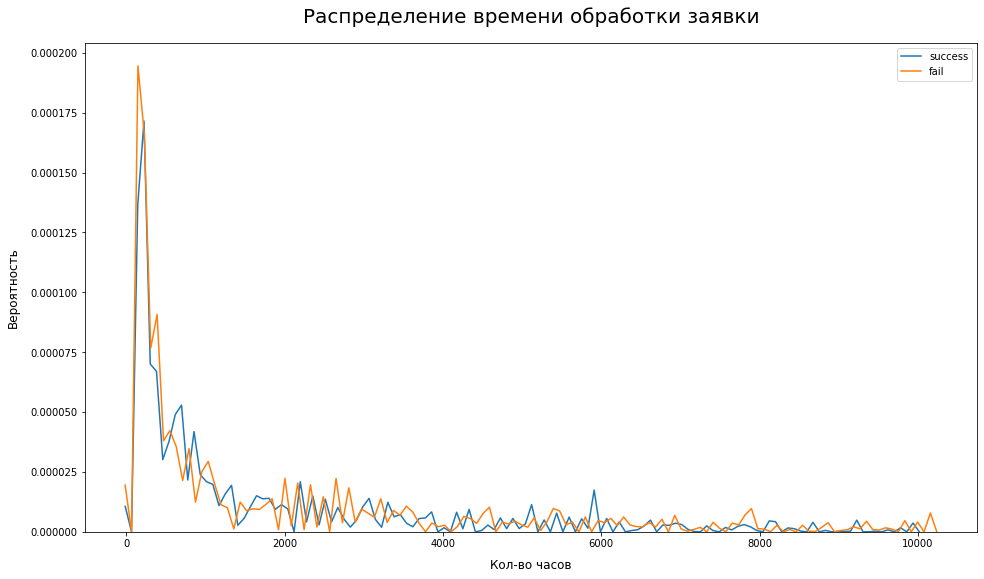

In [32]:
plt.figure(figsize=(16,9))
sns.distplot(data_paid_success['diff_between_fc_ad'], hist=False, label='success')
sns.distplot(data_paid_fail['diff_between_fc_ad'], hist=False, label='fail')
plt.xlabel('Кол-во часов', labelpad=10, fontsize=12)
plt.ylabel('Вероятность', labelpad=10, fontsize=12)
plt.title('Распределение времени обработки заявки', fontdict={'fontsize': 20}, pad=20)
plt.show()

## Проверим стат. значимость разницы во времени бутстрепом

In [33]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

In [34]:
success = data_paid_success['diff_between_fc_ad'].dropna().values
fail = data_paid_fail['diff_between_fc_ad'].dropna().values

In [35]:
boot_results = bs.bootstrap_ab(test=fail, ctrl=success, stat_func=bs_stats.median,
                       compare_func=bs_compare.difference, return_distribution=True)

In [36]:
borders = np.percentile(boot_results, [2.5, 97.5]) # считаем перцентили
borders

array([0.24712706, 2.29125736])

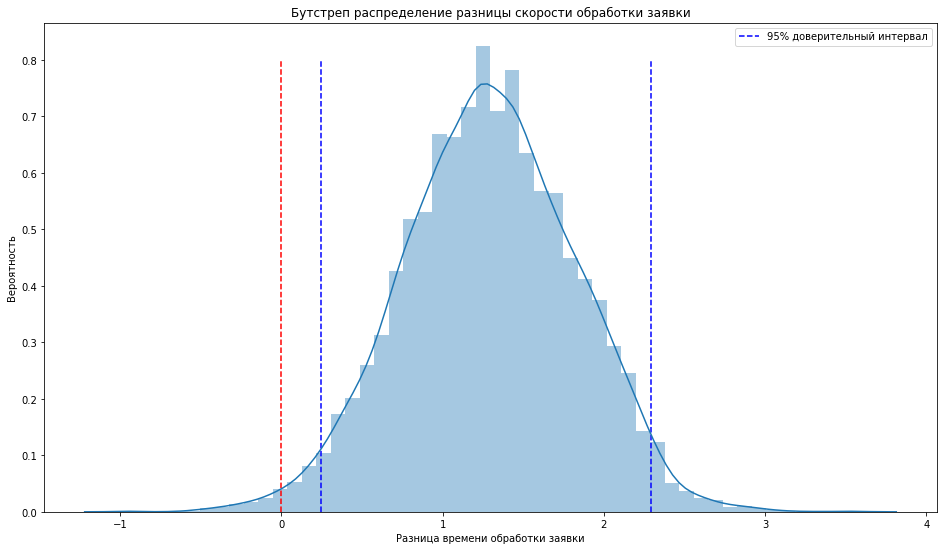

In [37]:
plt.figure(figsize=(16, 9))
sns.distplot(boot_results)
plt.vlines(borders, ymin=0, ymax=0.8, linestyles='--', colors='b', label='95% доверительный интервал')
plt.vlines(0, ymin=0, ymax=0.8, linestyles='--', colors='r')
plt.title('Бутстреп распределение разницы скорости обработки заявки')
plt.xlabel('Разница времени обработки заявки')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

### Так как 0 не входит в 95% доверительный интервал, значит есть стат. значимая разница между группами

# 4. Гипотеза: у пользователей, которые совершили покупку, прошло меньше времени между разговором с оператором и временем проведения пробного урока, чем у тех кто не совершил. Проверим.

In [38]:
data['diff_between_fr_tad'] = (data['trial_appointment_datetime'] - data['first_reach']) / pd.offsets.Hour(1)

In [39]:
data_paid_success = data[data['is_paid'] == 1]
data_paid_fail = data[data['is_paid'] == 0]

In [40]:
print(f'Размер выборки с покупкой равен {len(data_paid_success)}')
print(f'Размер выборки без покупки равен {len(data_paid_fail)}')

Размер выборки с покупкой равен 5018
Размер выборки без покупки равен 4982


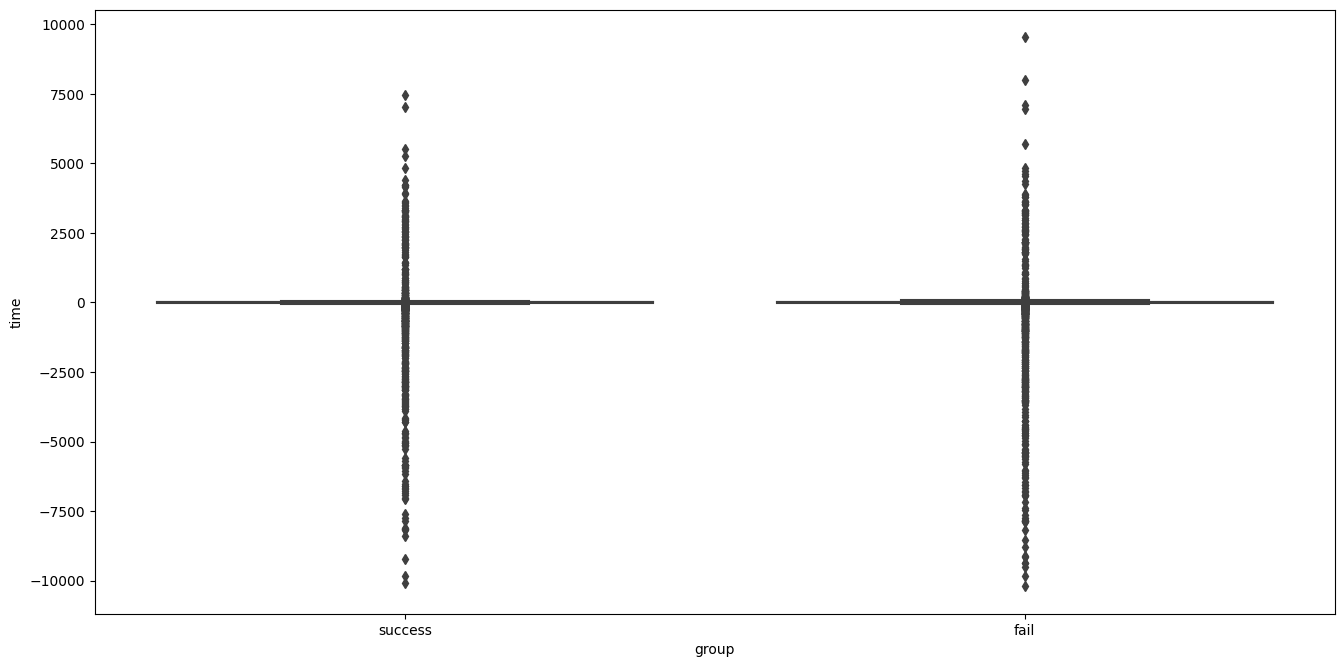

In [41]:
plt.figure(figsize=(16,8), dpi=100)
boxplot = pd.concat([pd.DataFrame({'group': 'success', 'time': data_paid_success['diff_between_fr_tad']}),
                     pd.DataFrame({'group': 'fail', 'time': data_paid_fail['diff_between_fr_tad']})])
ax = sns.boxplot(x="group", y="time", data=boxplot)

In [42]:
data_paid_success['diff_between_fr_tad'].describe()

count     4734.000000
mean       -94.643631
std        874.963993
min     -10091.720592
25%        -12.866290
50%          8.724478
75%         19.818079
max       7449.957708
Name: diff_between_fr_tad, dtype: float64

In [43]:
data_paid_fail['diff_between_fr_tad'].describe()

count     4684.000000
mean      -128.361144
std       1005.738678
min     -10201.847360
25%        -17.178082
50%          7.861092
75%         19.549642
max       9533.964158
Name: diff_between_fr_tad, dtype: float64

## Проверим стат. значимость разницы во времени бутстрепом

In [44]:
success = data_paid_success['diff_between_fr_tad'].dropna().values
fail = data_paid_fail['diff_between_fr_tad'].dropna().values

In [45]:
boot_results = bs.bootstrap_ab(test=fail, ctrl=success, stat_func=bs_stats.median,
                       compare_func=bs_compare.difference, return_distribution=True)

In [46]:
borders = np.percentile(boot_results, [2.5, 97.5])
borders

array([-1.85256647,  0.11266681])

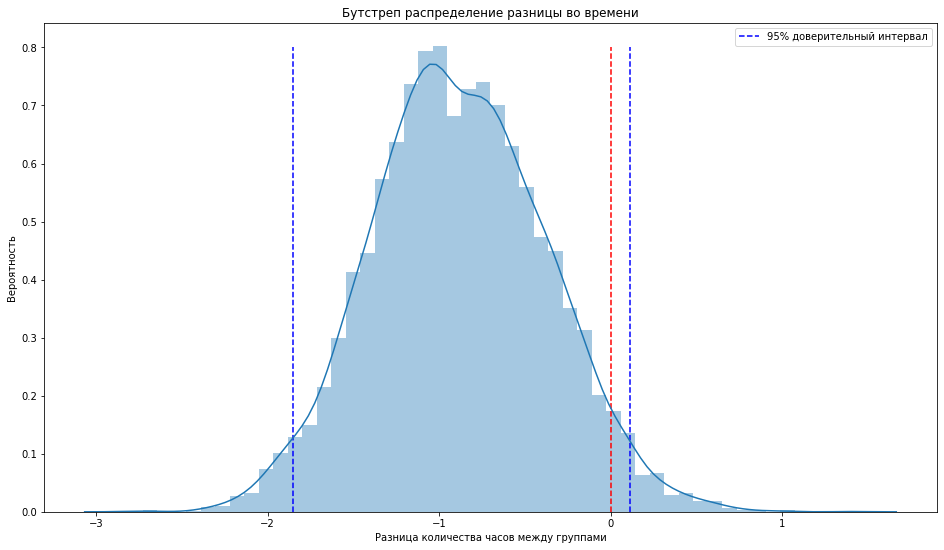

In [47]:
plt.figure(figsize=(16, 9))
sns.distplot(boot_results)
plt.vlines(borders, ymin=0, ymax=0.8, linestyles='--', colors='b', label='95% доверительный интервал')
plt.vlines(0, ymin=0, ymax=0.8, linestyles='--', colors='r')
plt.title('Бутстреп распределение разницы во времени')
plt.xlabel('Разница количества часов между группами')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

### 0 входит в 95% доверительный интервал - статистически значимой разницы нет

# 5. Постараемся найти причину по которой операторы иногда долго не звонят по заявке.

## Посмотрим как менялось время обработки заявки в течение суток

In [48]:
applications_by_hour = data.groupby(data['application_datetime'].dt.hour).\
                            agg({'order_id': 'count', 'diff_between_fc_ad': 'median'})

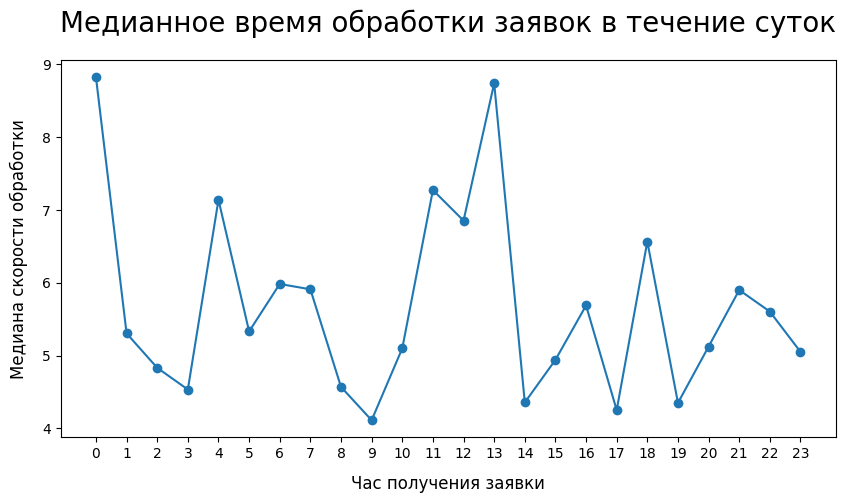

In [49]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(applications_by_hour['diff_between_fc_ad'], marker='o')
plt.xticks(applications_by_hour.index)
plt.xlabel('Час получения заявки', labelpad=10, fontsize=12)
plt.ylabel('Медиана скорости обработки', labelpad=10, fontsize=12)
plt.title('Медианное время обработки заявок в течение суток', fontdict={'fontsize': 20}, pad=20)
plt.show()

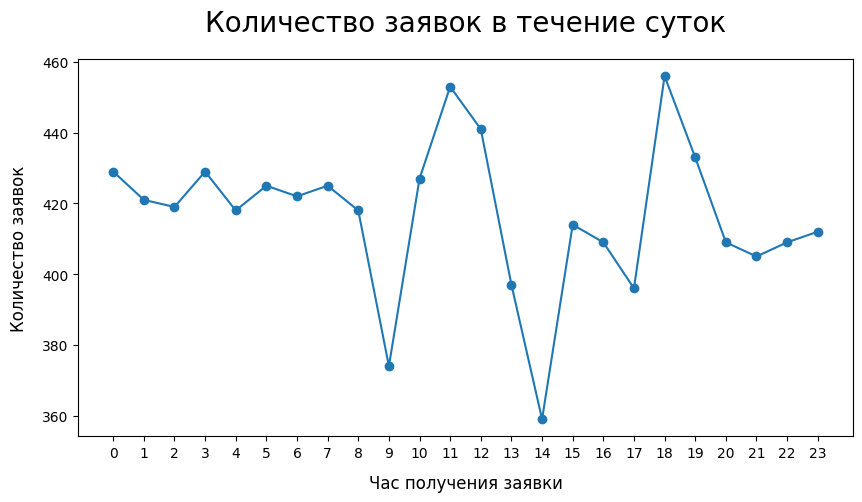

In [50]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(applications_by_hour['order_id'], marker='o')
plt.xticks(applications_by_hour.index)
plt.xlabel('Час получения заявки', labelpad=10, fontsize=12)
plt.ylabel('Количество заявок', labelpad=10, fontsize=12)
plt.title('Количество заявок в течение суток', fontdict={'fontsize': 20}, pad=20)
plt.show()

## Посмотрим как менялось время обработки заявки в течение года

In [51]:
applications_by_month = data.groupby(data['application_datetime'].dt.month).\
                            agg({'order_id': 'count', 'diff_between_fc_ad': 'median', 'appointment_added_by_id': 'nunique'})

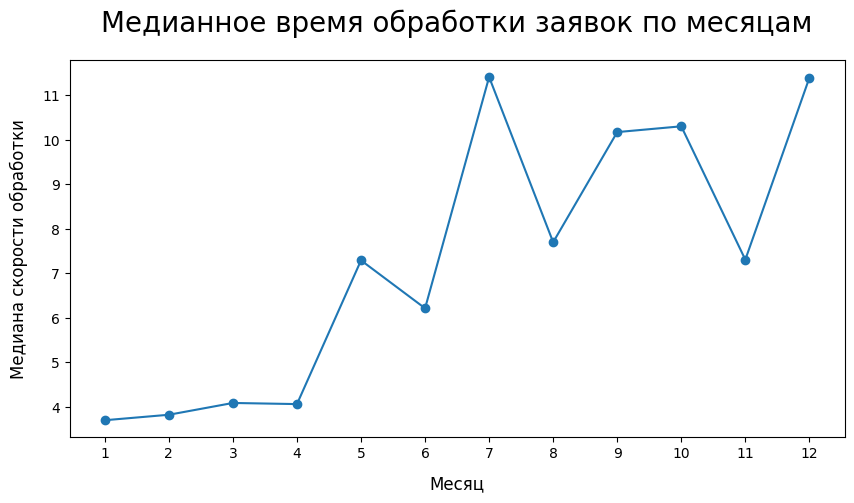

In [52]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(applications_by_month['diff_between_fc_ad'], marker='o')
plt.xticks(applications_by_month.index)
plt.xlabel('Месяц', labelpad=10, fontsize=12)
plt.ylabel('Медиана скорости обработки', labelpad=10, fontsize=12)
plt.title('Медианное время обработки заявок по месяцам', fontdict={'fontsize': 20}, pad=20)
plt.show()

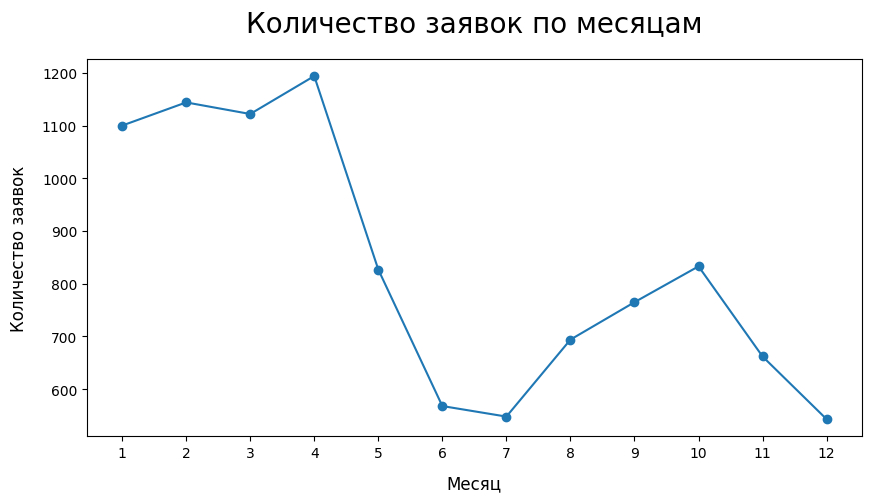

In [53]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(applications_by_month['order_id'], marker='o')
plt.xticks(applications_by_month.index)
plt.xlabel('Месяц', labelpad=10, fontsize=12)
plt.ylabel('Количество заявок', labelpad=10, fontsize=12)
plt.title('Количество заявок по месяцам', fontdict={'fontsize': 20}, pad=20)
plt.show()

## Количество заявок уменьшилось, а время обработки заявки увеличилось. Проверим нагруженность на операторов в течение года

In [57]:
applications_by_month['applications_per_operator'] = applications_by_month['order_id'] / applications_by_month['appointment_added_by_id'] 

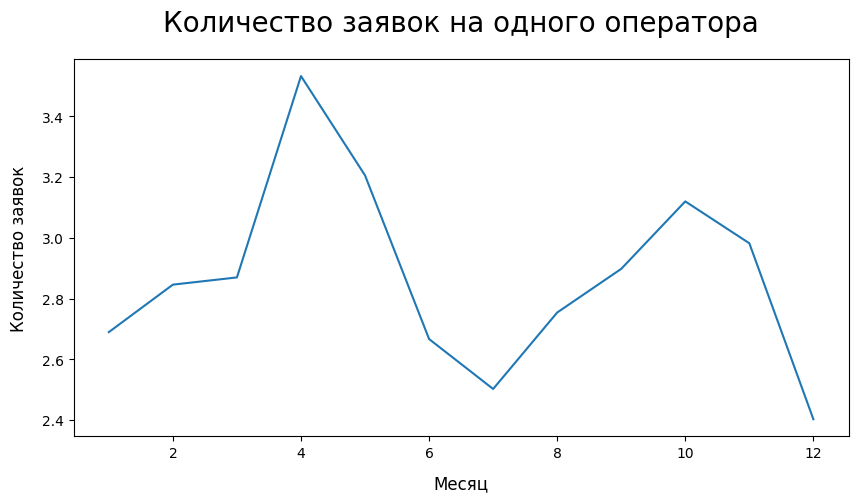

In [55]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(applications_by_month['applications_per_operator'])
plt.xlabel('Месяц', labelpad=10, fontsize=12)
plt.ylabel('Количество заявок', labelpad=10, fontsize=12)
plt.title('Количество заявок на одного оператора', fontdict={'fontsize': 20}, pad=20)
plt.show()

# 6. Выводы и рекоммендации

1. В файл bad_operators.csv выгружена информация про операторов, у которых конверсия обработки заявки в оплату ниже чем у 75% других операторов (конверсия С1 у них составляет меньше 28%). Рекоммендуется организовать дополнительный тренинг для этих операторов. 
2. Обнаружены статистически значимые различия в скорости обработки заявки (время от получения заявки до первого звонка оператора) между двумя группами:
   - пользователи, которые совершили покупку 
   - пользователи, которые не совершили покупку.
3. Медианное время обработки заявки операторами стало резко увеличиваться во второй половине года, при том что количество заявок, наоборот, - упало.
4. Так как скорость обработки заявки положительно сказывается на конверсии, рекомменуется отслеживать время обработки заявки у каждого оператора, либо установить порог для времени, за которое оператор должен позвонить потенциальному клиенту.